In [1]:
import pandas as pd
import numpy as np
import function_initial as  fn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('stock_data.csv',low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467495 entries, 0 to 467494
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      467495 non-null  object
 1   Symbol    467495 non-null  object
 2   LTP       467495 non-null  object
 3   %Change   467495 non-null  object
 4   High      467495 non-null  object
 5   Low       467495 non-null  object
 6   Open      467495 non-null  object
 7   Quantity  467433 non-null  object
 8   Turnover  467495 non-null  object
dtypes: object(9)
memory usage: 32.1+ MB


In [4]:
df.head(16)

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover
0,2000/1/10,EBL,546.00,1.11,546.00,545.00,540.00,220,"119,980.00"
1,2000/1/10,EIC,251.00,2.45,260.00,250.00,245.00,70,"17,710.00"
2,2000/1/10,HBL,"1,500.00",1.01,"1,500.00","1,475.00","1,485.00",370,"554,000.00"
3,2000/1/10,HBT,3.00,0.0,3.00,3.00,3.00,"5,380","16,140.00"
4,2000/1/10,JSM,340.00,-5.56,340.00,340.00,360.00,181,"61,540.00"
5,2000/1/10,LFC,93.00,9.41,93.00,93.00,85.00,10,930.00
6,2000/1/10,NABIL,861.00,0.12,861.00,860.00,860.00,424,"364,754.00"
7,2000/1/10,NBB,810.00,1.12,812.00,790.00,801.00,330,"266,660.00"
8,2000/1/10,NBBU,"1,750.00",0.0,"1,755.00","1,750.00","1,750.00",140,"245,650.00"
9,2000/1/10,NCM,236.00,-0.42,236.00,236.00,237.00,10,"2,360.00"


In [5]:
df['LTP'] = df['LTP'].str.replace(',', '')  # Remove commas from the values
df['LTP'] = pd.to_numeric(df['LTP'])
df['High'] = df['High'].str.replace(',', '')  # Remove commas from the values
df['High'] = pd.to_numeric(df['High'])
df['Low'] = df['Low'].str.replace(',', '')  # Remove commas from the values
df['Low'] = pd.to_numeric(df['Low'])
df['Open'] = df['Open'].str.replace(',', '')  # Remove commas from the values
df['Open'] = pd.to_numeric(df['Open'])
df['Turnover'] = df['Turnover'].str.replace(',', '')  # Remove commas from the values
df['Turnover'] = pd.to_numeric(df['Turnover'])
df['Quantity'] = df['Quantity'].str.replace(',', '')  # Remove commas from the values
df['Quantity'] = pd.to_numeric(df['Quantity'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467495 entries, 0 to 467494
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      467495 non-null  object 
 1   Symbol    467495 non-null  object 
 2   LTP       467495 non-null  float64
 3   %Change   467495 non-null  object 
 4   High      467495 non-null  float64
 5   Low       467495 non-null  float64
 6   Open      467495 non-null  float64
 7   Quantity  467433 non-null  float64
 8   Turnover  467495 non-null  float64
dtypes: float64(6), object(3)
memory usage: 32.1+ MB


In [7]:
df = fn.initialization(df,'SBL','2022-01-01','2022-12-30')


In [8]:
df['Average']= pd.Series(df['Turnover']/df['Quantity'])

In [9]:
df = fn.remove_average_outliers(df)

In [10]:
fn.plotly_plot_line(df,'Date','Average','NBL')

In [11]:
fn.plotly_plot_line(df,'Date','Turnover','NBL')

In [12]:
df = df[['LTP']].copy()

In [13]:
df

,LTP
406584,413.6
407973,426.0
408577,450.1
408780,438.0
408981,451.1
...,...
416389,310.0
416792,306.0
416992,306.0
417587,310.0


In [14]:
df =df.reset_index()
df.drop('index' , axis=1)

,LTP
0,413.6
1,426.0
2,450.1
3,438.0
4,451.1
...,...
227,310.0
228,306.0
229,306.0
230,310.0


In [15]:
df.describe()

,index,LTP
count,232.000000,232.000000
mean,429355.883621,356.164224
std,14014.255267,54.126923
min,404981.000000,288.400000
25%,417438.250000,310.675000
50%,429668.000000,324.900000
75%,441214.500000,398.250000
max,453164.000000,475.000000


In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
result = adfuller(df.LTP.dropna())
print(f"ADF Statistic:{result[0]}")
print(f"P value:{result[1]}")

ADF Statistic:-1.023825181738247
P value:0.7444757415654095


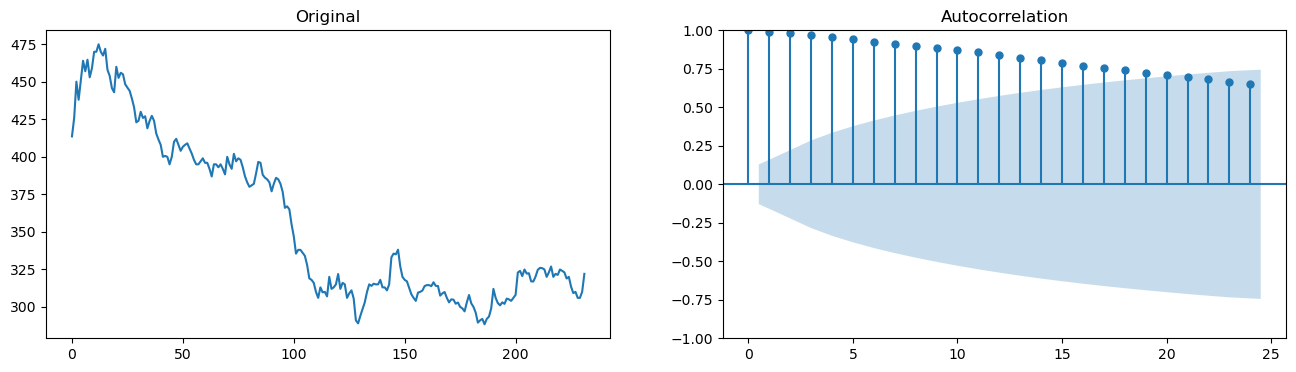

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.LTP)
ax1.set_title('Original')

plot_acf(df.LTP, ax=ax2)

plt.show()


In [19]:
diff1= df.LTP.diff().dropna()

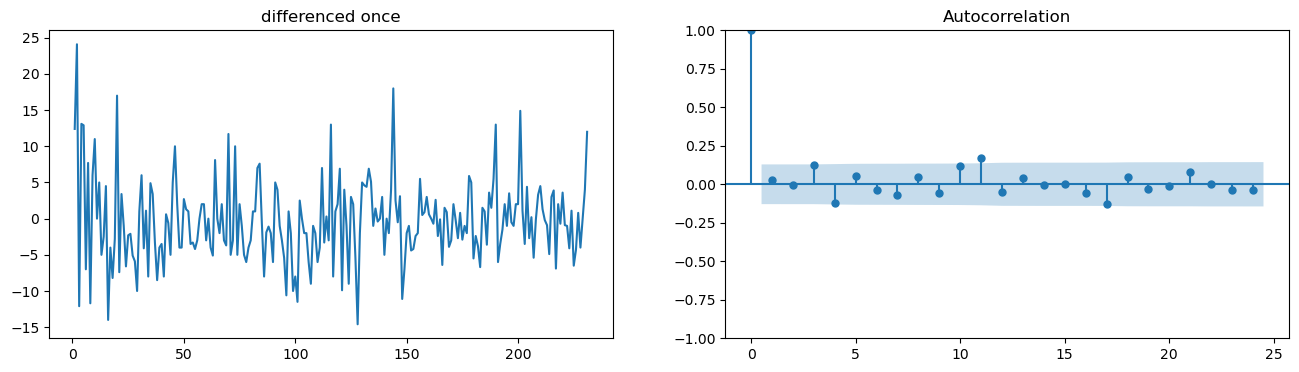

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff1)
ax1.set_title('differenced once')

plot_acf(diff1, ax=ax2)

plt.show()

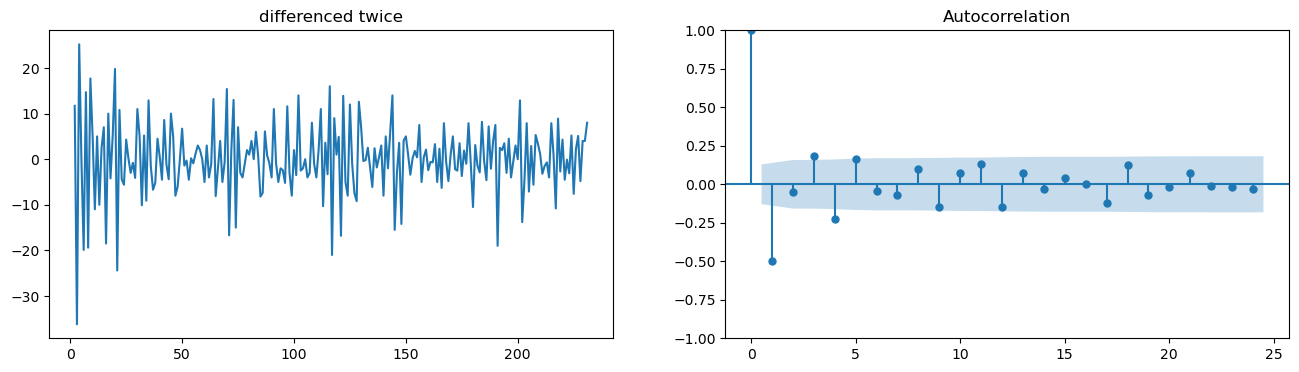

In [21]:
diff = df.LTP.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('differenced twice')

plot_acf(diff, ax=ax2)

plt.show()


#this shows there is  significant differene between differencing the plot once or twice so the plot can be differentiated twice

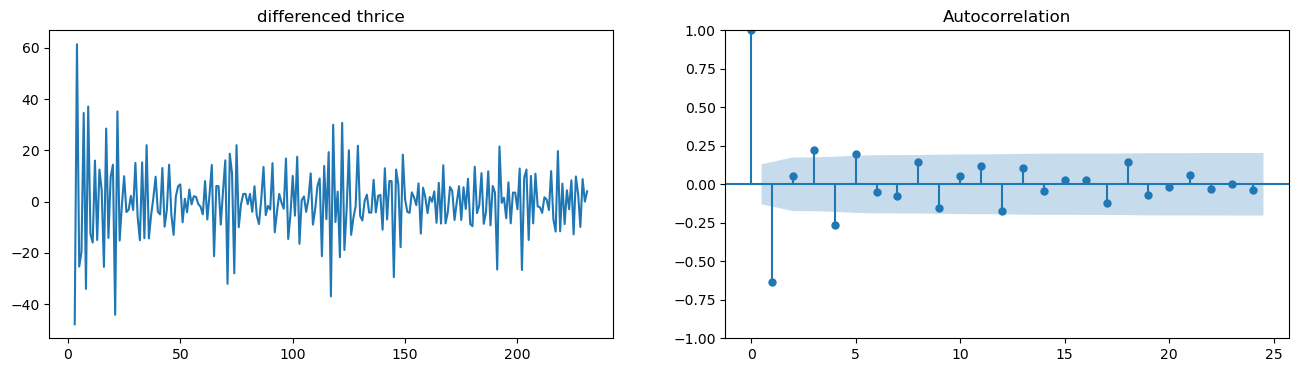

In [22]:
diff = df.LTP.diff().diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('differenced thrice')

plot_acf(diff, ax=ax2)

plt.show()



In [23]:
# alternative to this visual test , is to use pmdarima to find the optimum number of differentation to make a data statinary

from pmdarima.arima.utils import ndiffs

ndiffs (df['LTP'], test="adf")

1

In [24]:
# here we can see ndiffs returns 1 so that we now that the data can be made stationary if it is differentiated one

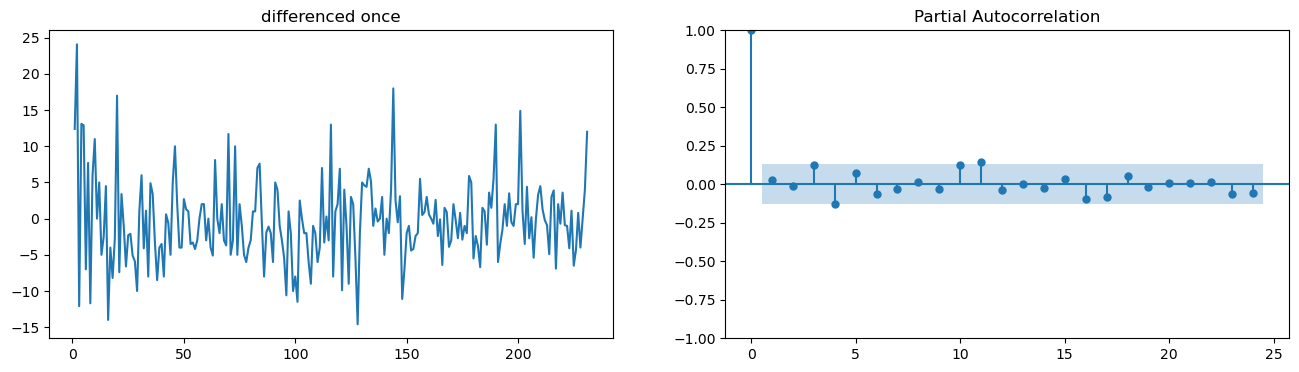

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df.LTP.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('differenced once')

plot_pacf(diff,method='ywm', ax=ax2)

plt.show()


In [26]:
#here we see that the pacf plot for the plot is exceeding the significant level till 2 terms 
# so the order of the AR term (p) is 2

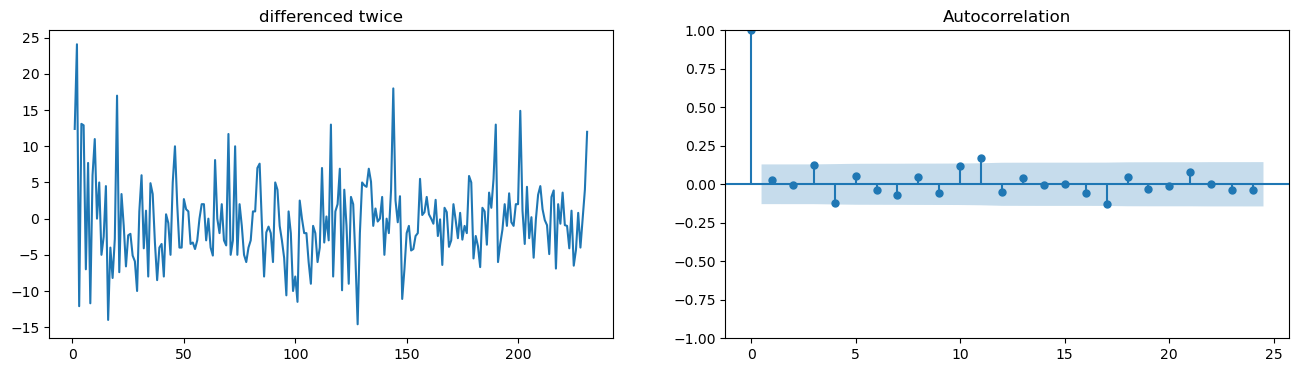

In [27]:
diff = df.LTP.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title('differenced twice')

plot_acf(diff, ax=ax2)

plt.show()


In [28]:
#from this we can see that the acf plot of the data is above significance level for a single lag , just one behind
#so we assign the order for MA term q =1

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(diff, order=(2,1,2))
result = model.fit(disp = 0)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [30]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                    LTP   No. Observations:                  231
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -725.841
Date:                Sun, 28 May 2023   AIC                           1461.681
Time:                        12:56:53   BIC                           1478.871
Sample:                             0   HQIC                          1468.615
                                - 231                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7559      0.174     -4.351      0.000      -1.096      -0.415
ar.L2         -0.0684      0.068     -1.006      0.315      -0.202       0.065
ma.L1         -0.1907      0.148     -1.290      0.1

(array([0.00088463, 0.        , 0.00176926, 0.0026539 , 0.01503874,
        0.0636935 , 0.07696298, 0.03096212, 0.00796169, 0.00442316]),
 array([-31.06771922, -26.17415386, -21.28058851, -16.38702316,
        -11.4934578 ,  -6.59989245,  -1.7063271 ,   3.18723825,
          8.08080361,  12.97436896,  17.86793431]),
 <BarContainer object of 10 artists>)

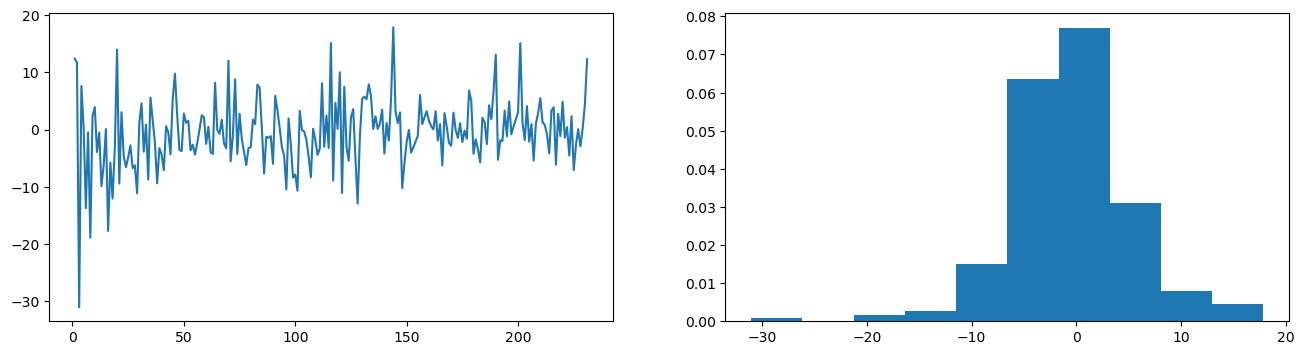

In [31]:
residuals = pd.DataFrame(result.resid)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (16,4))

ax1.plot(residuals)
ax2.hist(residuals, density =True)

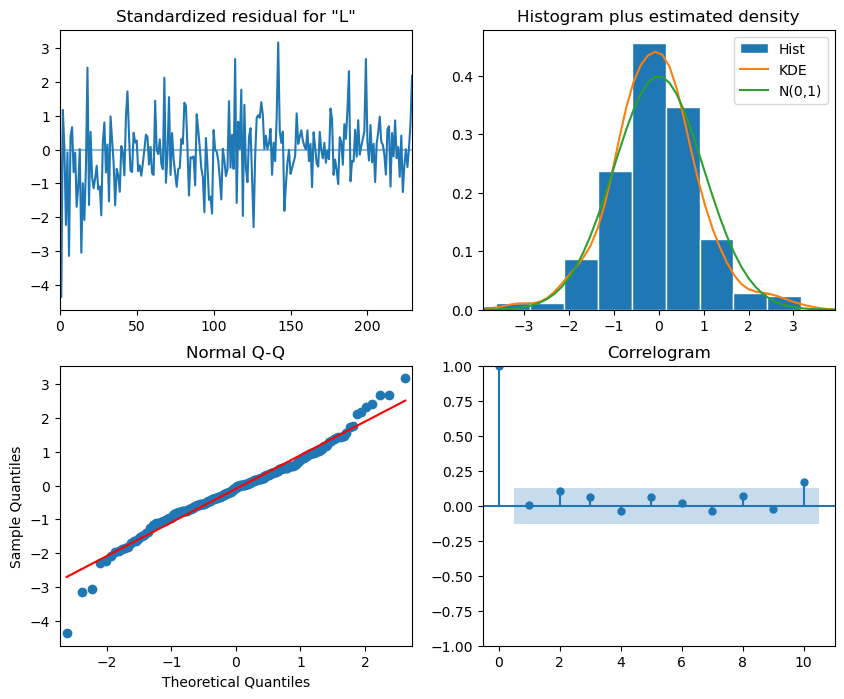

In [32]:
result.plot_diagnostics(figsize=(10, 8))
plt.show()



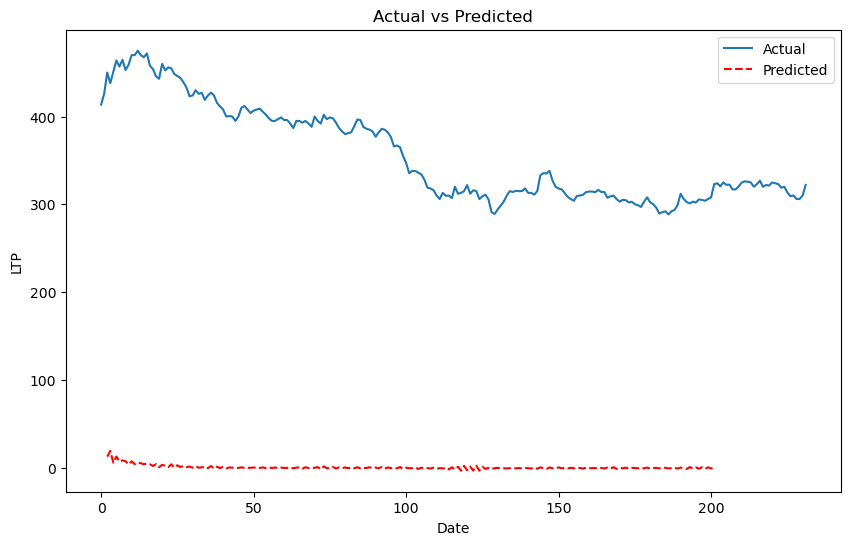

In [33]:
# Obtain the predicted values
pred = result.get_prediction(start=1, end=200)

# Extract the predicted mean values
pred_mean = pred.predicted_mean

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['LTP'], label='Actual')
plt.plot(pred_mean.index, pred_mean, color='red', linestyle='--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('LTP')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [34]:
#train_test_split
n = int(len(df) *0.8)
train = df.LTP[:n]
test = df.LTP[n:]

In [35]:
model1 = SARIMAX(train , order=(2,1,1))
result = model1.fit(disp= 0)

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    LTP   No. Observations:                  185
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -587.635
Date:                Sun, 28 May 2023   AIC                           1183.271
Time:                        12:56:55   BIC                           1196.131
Sample:                             0   HQIC                          1188.483
                                - 185                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8924      0.184      4.843      0.000       0.531       1.254
ar.L2          0.0146      0.072      0.203      0.839      -0.127       0.156
ma.L1         -0.8651      0.177     -4.886      0.000      -1.212      -0.518
sigma2        34.7874      2.846     12.222      0.000      29.209      40.366
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                34.26
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:

import pmdarima as pm

# Assuming you have a time series dataset in a pandas DataFrame called 'data'
# 'data' should have a single column representing the time series values

# Split the data into training and test sets

# Create and fit the Auto ARIMA model
model = pm.auto_arima(train, seasonal=False, trace=True)

# Print the selected ARIMA model order
print("ARIMA Model Order:", model.order)

# Generate forecasts for the test set
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Create a DataFrame with the forecasted values and confidence intervals
forecast_df = pd.DataFrame({'Forecast': forecast, 'Lower_CI': conf_int[:, 0], 'Upper_CI': conf_int[:, 1]}, index=test.index)

# Print the forecast DataFrame
print(forecast_df)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1178.257, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1180.198, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1180.197, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1178.603, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1178.786, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.900 seconds
ARIMA Model Order: (0, 1, 0)
       Forecast    Lower_CI    Upper_CI
185  290.333696  278.804252  301.863139
186  289.667391  273.362296  305.972487
187  289.001087  269.031505  308.970669
188  288.334783  265.275896  311.393670
189  287.668478  261.887859  313.449098
190  287.002174  258.760920  315.243428
191  286.335870  255.831829  316.839910
192  285.669565  253.059374  318.279756
193  285.003261  250.414930  319.591591
194  284.336957  247.877655  320.796258
195  283.670652  245

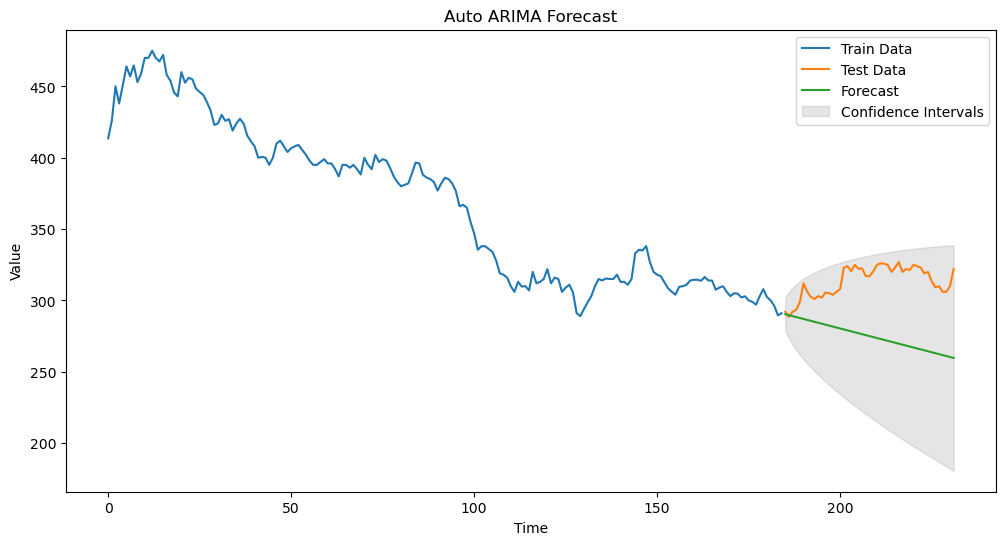

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train Data')
plt.plot(test, label='Test Data')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='gray', alpha=0.2, label='Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecast')
plt.legend()
plt.show()